In [1]:
import os

from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

import src.dataset.utils as dutils

%load_ext autoreload
%autoreload 2

if not os.path.exists('./images/'):
    os.mkdir('./images/')

In [2]:
# images are printed as presented to the model during training
image_transformer = dutils.get_default_image_transformer()

loader = DataLoader(
    dataset=ImageFolder(os.path.join('data', "train"), transform=image_transformer),
    shuffle=True,
    batch_size=8,
)

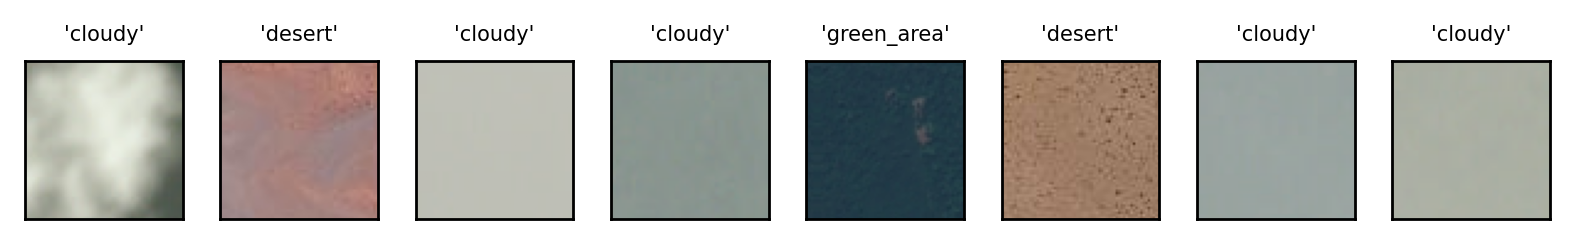

In [45]:
images, labels = next(iter(loader))
fig, axs = plt.subplots(1, len(images), dpi=250)

for ax, im, lab in zip(axs, images, labels):
    im = dutils.denormalize_images(im)
    im = im[0].permute(1, 2, 0)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"\'{dutils.CLASS_MAPPER[lab.item()]}\'", fontsize=6)

fig.tight_layout()
fig.savefig(os.path.join('images', 'training_samples.png'), bbox_inches='tight')